In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/TitanicPreprocessed - TitanicPreprocessed.csv')

In [3]:
df.duplicated().sum()

95

In [4]:
df = df.drop_duplicates()

In [5]:
# Shuffle your dataset
shuffle_df = df.sample(frac=1)

# Define a size for your train set
train_size = int(0.9 * len(df))

# Split your dataset
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [6]:
X_train = train_set.drop('Survived', axis=1).values
y_train = train_set['Survived'].values

In [77]:
X_test = test_set.drop('Survived', axis=1).values
y_test = test_set['Survived'].values

In [8]:
X_train = X_train - X_train.min() / (X_train.max() - X_train.min())

In [78]:
X_test = X_test - X_test.min() / (X_test.max() - X_test.min())

In [10]:
#Activations

def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH=np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

#Loss Functions

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

#Misc

def one_hot(y):
  N=len(y)
  K=len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]]=1

  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y - y.mean())**2)

In [11]:
def derivative(Z, a):

  if a == linear:
    return 1
  elif a == sigmoid:
    return Z*(1-Z)
  elif a == np.tanh:
    return 1-Z*Z
  elif a == ReLU:
    return (Z>0).astype(int)
  else:
    ValueError("Unknown Activation")

In [30]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit (self, X, y, eta=1e-3, epochs=1e3,show_curve=False):
    epochs= int(epochs)
    if self.mode:
      Y=y
      K=1
    else:
      Y = one_hot(y)
      K = Y.shape[1]

    N,D = X.shape


    #Initialize Weights and Biases: Stochastic
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}

    #Activations
    if self.activations is None:
      self.a = {l: ReLU for l in range(1,self.L)}
    else:
      self.a ={l: act for l , act in enumerate(self.activations,1)}

    #Output Activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=sigmoid

    J = np.zeros(epochs)

    #Grad Descent/ Back prop

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted (self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ =dH@self.W[l].T
          dH =dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.b[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)


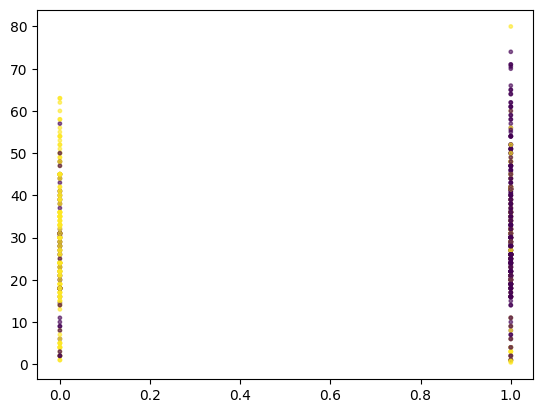

In [25]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, s=6, alpha=0.6)

<ipython-input-10-771f77e9be58>:10: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-H))


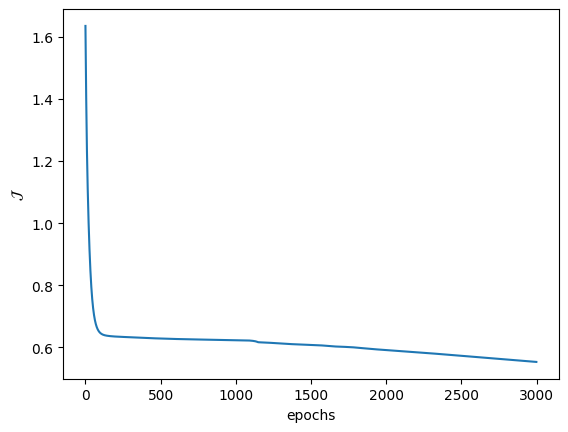

In [74]:
my_ann_classifier = ANN(architecture=[4,4], activations=[sigmoid,sigmoid])
my_ann_classifier.fit(X_train,y_train, eta=4e-2, epochs=3e3, show_curve=True)

In [75]:
y_hat=my_ann_classifier.predict(X_train)

In [76]:
print(f"Training Accuracy:  {accuracy(y_train,y_hat):0.4f}")

Training Accuracy:  0.7360


In [79]:
y_hat_test=my_ann_classifier.predict(X_test)

In [80]:
print(f"Testing Accuracy:  {accuracy(y_test,y_hat_test):0.4f}")

Testing Accuracy:  0.7000
